## IPCA 
- **Órgão Responsável:** IBGE
- **Divulgação:** Nos primeiros 10 dias úteis do mês. Referência do mês anterior. 

## IPCA-15 - Prévia do IPCA
- **Órgão Responsável:** IBGE
- **Divulgação:** Nos últimos 10 dias do mês. Referência do mês corrente. 
- **Antecedência:** De 10 a 15 dias antes do IPCA

## INPC 
- **Órgão Responsável:** IBGE
- **Divulgação:** Nos primeiros 10 dias úteis do mês. Referência do mês anterior. 

## INCC-DI - Índice Nacional da Construção Civil
- **Órgão Responsável:** Fundação Getulio Vargas (FGV)
- **Divulgação:** Nos primeiros 10 dias úteis do mês. Referência do mês anterior.
- **Período de Medição:** Entre o primeiro e o último dia do mês de referência 

## INCC-10 - Prévia do INCC
- **Órgão Responsável:** Fundação Getulio Vargas (FGV)
- **Divulgação:** Segunda quinzena do mês de referência.
- **Período de Medição:** Entre o dia 11 do mês anterior e o dia 10 do mês de referência

## INCC-M - Índice Nacional da Construção Civil - Mercado
- **Órgão Responsável:** Fundação Getulio Vargas (FGV)
- **Divulgação:** Final de cada mês de referência
- **Período de Medição:** Entre o dia 21 do mês anterior e o dia 20 do mês de referência

## IPA-DI - Índice do Produtor Amplo
- **Órgão Responsável:** Fundação Getulio Vargas (FGV)
- **Divulgação:** Final de cada mês de referência
- **Período de Medição:** Entre o dia 21 do mês anterior e o dia 20 do mês de referência

## IPA-10 - Prévia do IPA
- **Órgão Responsável:** Fundação Getulio Vargas (FGV)
- **Divulgação:** Segunda quinzena do mês de referência.
- **Período de Medição:** Entre o dia 11 do mês anterior e o dia 10 do mês de referência

## IPA-M - Índice do Produtor Amplo - Mercado
- **Órgão Responsável:** Fundação Getulio Vargas (FGV)
- **Divulgação:** Final de cada mês de referência
- **Período de Medição:** Entre o dia 21 do mês anterior e o dia 20 do mês de referência

## IPC - Índice de Preços ao Consumidor
- **Órgão Responsável:** Fundação Getulio Vargas (FGV)
- **Divulgação:** Nos primeiros 10 dias úteis do mês. Referência do mês anterior.
- **Período de Medição:** Primeiro e último mês de referência


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
import statsmodels.formula.api as smapi

In [2]:
df = pd.read_csv("inflacao.csv")

In [3]:
df.head()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo,consolidado_ano
0,1980-01,1980,1,198001,6.62,6.62,0.0,0.0,0.0,0.0,...,4.48,4.70,4.70,0.0,0.0,0.0,0.0,0.0,2932.8,False
1,1980-02,1980,2,198002,4.62,11.54,0.0,0.0,0.0,0.0,...,7.83,9.53,14.23,0.0,0.0,0.0,0.0,0.0,2932.8,False
2,1980-03,1980,3,198003,6.04,18.27,0.0,0.0,0.0,0.0,...,12.17,12.80,27.03,0.0,0.0,0.0,0.0,0.0,2932.8,False
3,1980-04,1980,4,198004,5.29,24.53,0.0,0.0,0.0,0.0,...,16.10,3.13,30.16,0.0,0.0,0.0,0.0,0.0,2932.8,False
4,1980-05,1980,5,198005,5.70,31.63,0.0,0.0,0.0,0.0,...,22.62,4.86,35.02,0.0,0.0,0.0,0.0,0.0,4149.6,False


### Prevendo o IPCA consolidado através da prévia do IPCA15

In [4]:
cols = ['referencia', 'ipca_variacao', 'ipca15_variacao']

if all(col in df.columns for col in cols):
    df_corr = df[cols]
    print("Colunas selecionadas com sucesso!")
else:
    missing_cols = [col for col in cols if col not in df.columns]
    print("As seguintes colunas não estão presentes no DataFrame:")
    print(missing_cols)

Colunas selecionadas com sucesso!


In [5]:
df_corr.head()

,referencia,ipca_variacao,ipca15_variacao
0,1980-01,6.62,0.0
1,1980-02,4.62,0.0
2,1980-03,6.04,0.0
3,1980-04,5.29,0.0
4,1980-05,5.70,0.0


In [6]:
df_corr.dtypes

referencia          object
ipca_variacao      float64
ipca15_variacao    float64
dtype: object

In [7]:
df_corr['referencia'] = pd.to_datetime(df_corr['referencia'])

/tmp/ipykernel_17834/601951007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['referencia'] = pd.to_datetime(df_corr['referencia'])


In [8]:
df_corr.corr()

,referencia,ipca_variacao,ipca15_variacao
referencia,1.000000,-0.479516,0.534054
ipca_variacao,-0.479516,1.000000,-0.329657
ipca15_variacao,0.534054,-0.329657,1.000000


In [9]:
numeric_cols = [col for col in cols if df_corr[col].dtype != object]
df_corr.loc[:, numeric_cols] = df_corr.loc[:, numeric_cols].replace(0, np.nan)

In [10]:
df_corr

,referencia,ipca_variacao,ipca15_variacao
0,1980-01-01,6.62,NaN
1,1980-02-01,4.62,NaN
2,1980-03-01,6.04,NaN
3,1980-04-01,5.29,NaN
4,1980-05-01,5.70,NaN
...,...,...,...
516,2023-01-01,0.53,0.55
517,2023-02-01,0.84,0.76
518,2023-03-01,0.71,0.69
519,2023-04-01,0.61,0.57


In [11]:
df_corr = df_corr.dropna()

In [12]:
df_corr.shape

(276, 3)

In [13]:
df_corr.head()

,referencia,ipca_variacao,ipca15_variacao
244,2000-05-01,0.01,0.09
245,2000-06-01,0.23,0.08
246,2000-07-01,1.61,0.78
247,2000-08-01,1.31,1.99
248,2000-09-01,0.23,0.45


In [14]:
df_corr.tail()

,referencia,ipca_variacao,ipca15_variacao
516,2023-01-01,0.53,0.55
517,2023-02-01,0.84,0.76
518,2023-03-01,0.71,0.69
519,2023-04-01,0.61,0.57
520,2023-05-01,0.23,0.51


In [15]:
df_corr.corr()

,referencia,ipca_variacao,ipca15_variacao
referencia,1.000000,-0.119015,-0.111535
ipca_variacao,-0.119015,1.000000,0.854815
ipca15_variacao,-0.111535,0.854815,1.000000


In [16]:
stats.pearsonr(
    df_corr['ipca_variacao'], 
    df_corr['ipca15_variacao'], 
)

PearsonRResult(statistic=0.8548148693807875, pvalue=4.906022360633788e-80)

* 0.85% de correlação é considerada alta 

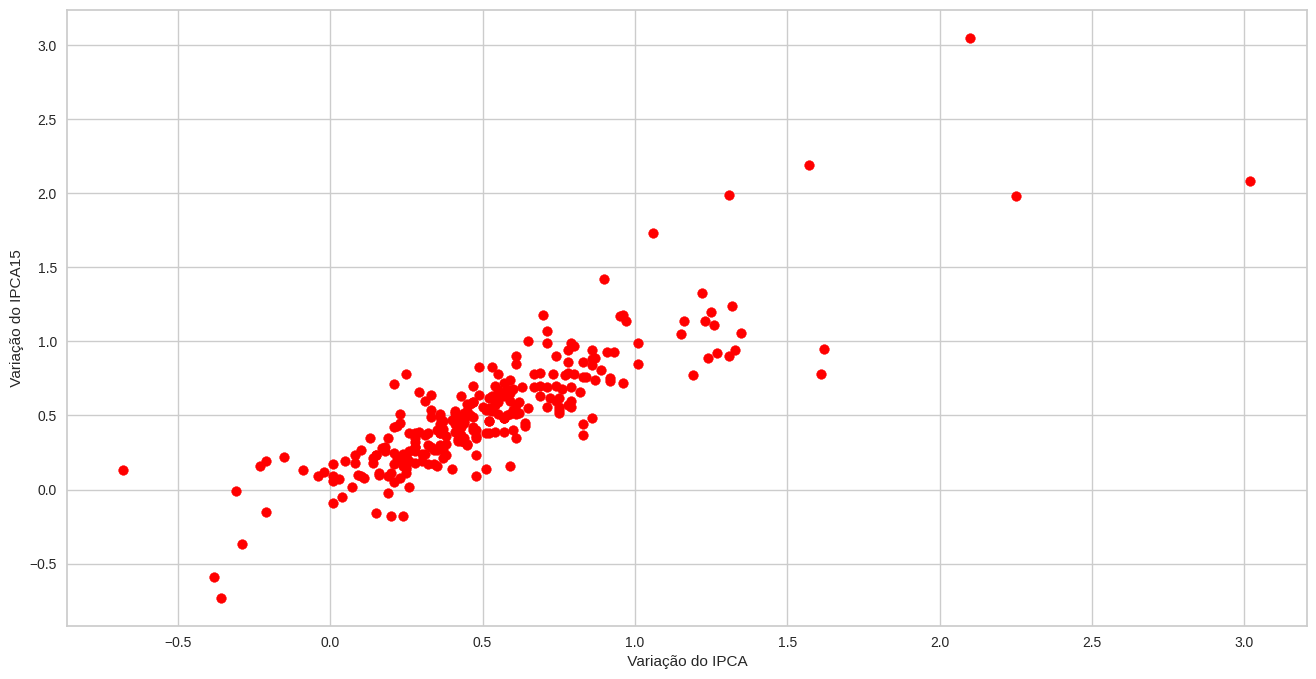

In [17]:
plt.figure(figsize = (16,8))
plt.scatter(
    df_corr['ipca_variacao'], 
    df_corr['ipca15_variacao'], 
    c='red')
plt.xlabel(" Variação do IPCA ")
plt.ylabel(" Variação do IPCA15 ")
plt.show()

#### Encontrando a Malhor Reta para a progressão

In [18]:
reg = LinearRegression()

#### Transformando os Series do Pandas em Arrays para fazer o fit dos dados. 

In [19]:
reg.fit(
    df_corr['ipca15_variacao'].values.reshape(-1, 1), 
    df_corr['ipca_variacao'].values.reshape(-1, 1)
)

LinearRegression()

In [20]:
reg.coef_

array([[0.84728291]])

#### Melhor possibilidade de onde a reta vai cortar o eixo. 

In [21]:
reg.intercept_

array([0.07973822])

#### Testando o coeficiente de interceptação para traçar o gráfico linearmente

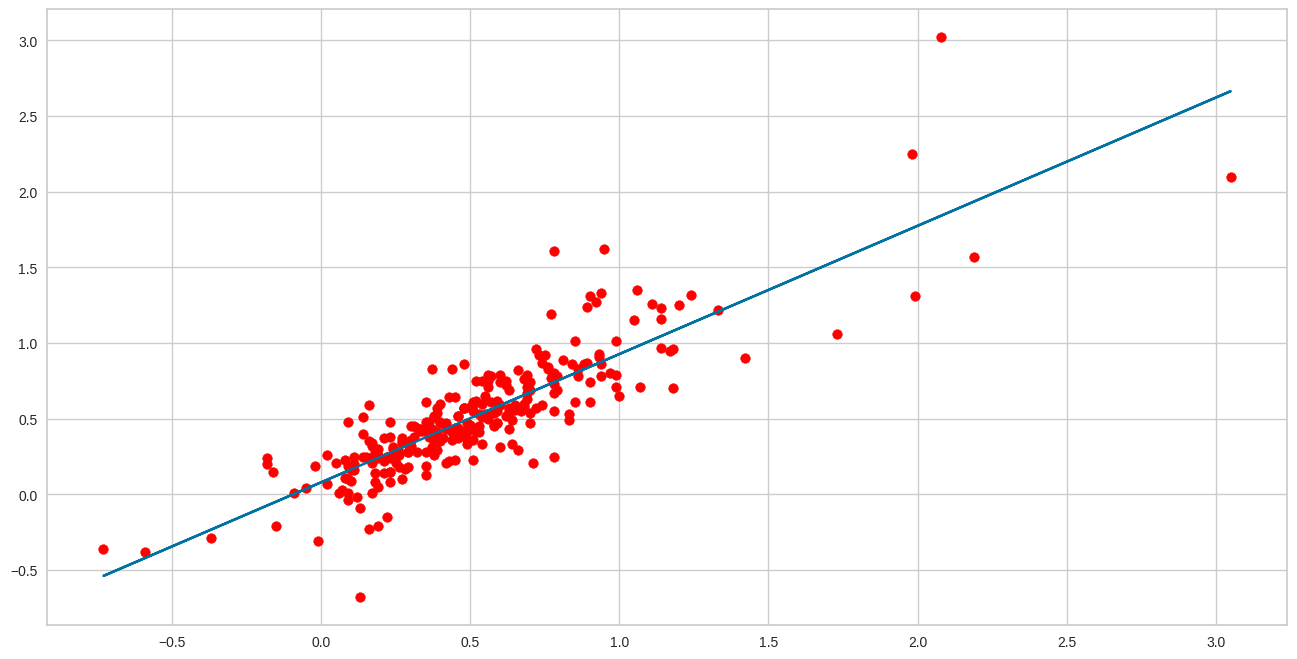

In [22]:
plt.figure(figsize = (16,8))
plt.scatter(df_corr['ipca15_variacao'], df_corr['ipca_variacao'], c="red")
x = np.array(df_corr['ipca15_variacao'])
y = reg.intercept_ + x * reg.coef_
plt.plot(x, y[0], "b")
plt.show()

In [23]:
X = df_corr['ipca_variacao']
y = df_corr['ipca15_variacao']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        ipca15_variacao   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     743.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           4.91e-80
Time:                        21:55:52   Log-Likelihood:                 38.200
No. Observations:                 276   AIC:                            -72.40
Df Residuals:                     274   BIC:                            -65.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0701      0.021      3.385

#### Resultado do Modelo
O R2 é de 0.727.
Isso significa que 73% do comportamento da variável `ipca_variacao` é explicado pela variável `ipca15_variacao`.
Nosso p-valor é de 0.001. Isso significa que `não` podemos aceitar a hipótese nula. Se o mesmo estivesse alto, aceitariamos a hipótese nula e chegariamos a conclusão de que os dados  são bons o suficiente para gerar um modelo bom.

# Treinando e ajustando o modelo de regressão

## Criando dataset de treino x teste

In [24]:
X = df_corr['ipca15_variacao'].values.reshape(-1, 1)

In [25]:
y = df_corr['ipca_variacao'].values.reshape(-1, 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, shuffle=False)

In [27]:
X_train.shape

(234, 1)

In [28]:
X_test.shape

(42, 1)

## Treinando o modelo de regressão

In [29]:
regressor = LinearRegression()

In [30]:
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
regressor.intercept_

array([0.08030396])

In [32]:
regressor.coef_

array([[0.84532517]])

## Teste do Modelo

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
df_preds = pd.DataFrame({'Valor Real': y_test.squeeze(), 'Predicted': y_pred.squeeze()})

In [35]:
df_preds.head(20)

,Valor Real,Predicted
0,1.15,0.967895
1,0.21,0.680485
2,0.25,0.266275
3,0.07,0.097210
4,-0.31,0.071851
5,-0.38,-0.418438
6,0.26,0.097210
7,0.36,0.333902
8,0.24,0.274729
9,0.64,0.460700


##### MAE - Mean Absolute Error 

**Erro Absoluto Médio (MAE)**: Subtraímos os valores previstos dos valores reais, obtendo os erros, somamos os valores absolutos desses erros e obtemos sua média. Essa métrica dá uma noção do erro geral para cada previsão do modelo, quanto menor (mais próximo de 0) melhor.

##### MSE - Mean Squared Error
**Erro Quadrático Médio (MSE)** É semelhante à métrica MAE, mas eleva ao quadrado os valores absolutos dos erros. Além disso, como no MAE, quanto menor ou mais próximo de 0, melhor. O valor MSE é elevado ao quadrado para tornar os erros ainda maiores. Uma coisa a ter bastante atenção é que costuma ser uma métrica difícil de interpretar devido ao tamanho de seus valores e ao fato de não estarem na mesma escala dos dados.

##### RMSE - Root Mean Squared Error
**Raiz quadrada do erro-médio (RMSE)** : Tenta resolver o problema de interpretação levantado com o MSE obtendo a raiz quadrada de seu valor final, de modo a escalá-lo de volta para as mesmas unidades dos dados. É mais fácil de interpretar e bom quando precisamos exibir ou mostrar o valor real dos dados com o erro. Ele mostra o quanto os dados podem variar, portanto, se tivermos um RMSE de 4,35, nosso modelo pode cometer um erro porque adicionou 4,35 ao valor real ou precisou de 4,35 para chegar ao valor real. Quanto mais próximo de 0, melhor também.


In [36]:
Referencia_train, Referencia_test, ipca_train, ipca_test = train_test_split(df_corr['referencia'], df_corr['ipca_variacao'], test_size = 0.15, shuffle=False, random_state = 0)

In [37]:
df_corr['referencia']

244   2000-05-01
245   2000-06-01
246   2000-07-01
247   2000-08-01
248   2000-09-01
         ...    
516   2023-01-01
517   2023-02-01
518   2023-03-01
519   2023-04-01
520   2023-05-01
Name: referencia, Length: 276, dtype: datetime64[ns]

In [38]:
Referencia_test

479   2019-12-01
480   2020-01-01
481   2020-02-01
482   2020-03-01
483   2020-04-01
484   2020-05-01
485   2020-06-01
486   2020-07-01
487   2020-08-01
488   2020-09-01
489   2020-10-01
490   2020-11-01
491   2020-12-01
492   2021-01-01
493   2021-02-01
494   2021-03-01
495   2021-04-01
496   2021-05-01
497   2021-06-01
498   2021-07-01
499   2021-08-01
500   2021-09-01
501   2021-10-01
502   2021-11-01
503   2021-12-01
504   2022-01-01
505   2022-02-01
506   2022-03-01
507   2022-04-01
508   2022-05-01
509   2022-06-01
510   2022-07-01
511   2022-08-01
512   2022-09-01
513   2022-10-01
514   2022-11-01
515   2022-12-01
516   2023-01-01
517   2023-02-01
518   2023-03-01
519   2023-04-01
520   2023-05-01
Name: referencia, dtype: datetime64[ns]

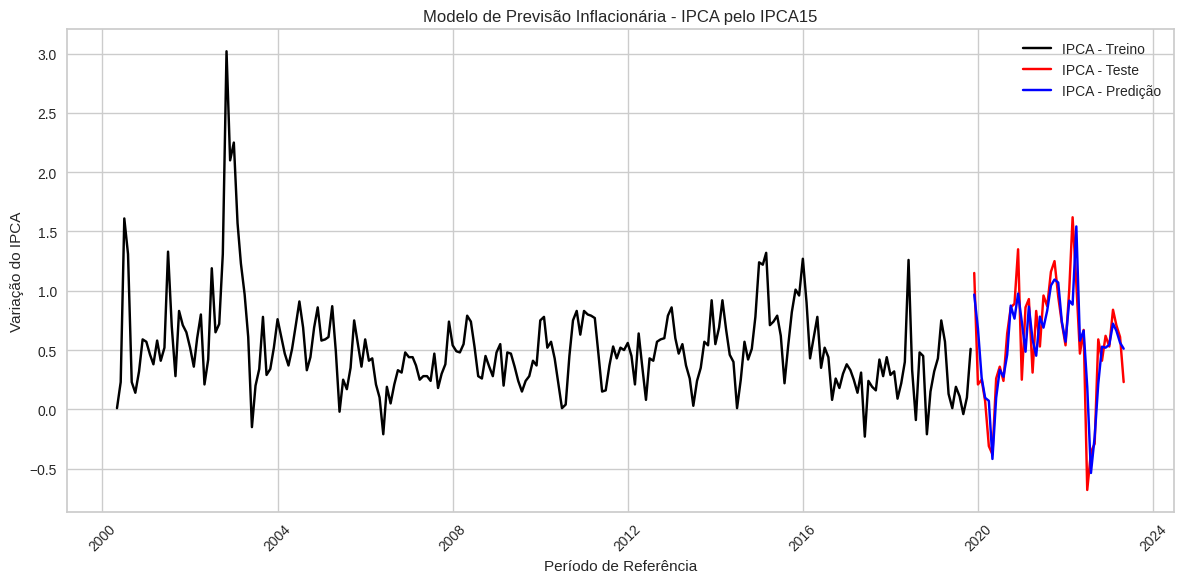

In [39]:
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura de acordo com suas preferências

# Plota os dados de treinamento
plt.plot(Referencia_train, ipca_train, label="IPCA - Treino", color='black')

# Plota os dados de teste
plt.plot(Referencia_test, ipca_test, label="IPCA - Teste", color='red')

# Plota as previsões do modelo
plt.plot(Referencia_test, y_pred.squeeze(), label="IPCA - Predição", color='blue')

plt.xlabel("Período de Referência")
plt.ylabel("Variação do IPCA")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade

plt.title("Modelo de Previsão Inflacionária - IPCA pelo IPCA15")
plt.legend()

plt.tight_layout()  # Melhora o espaçamento entre os elementos do gráfico
plt.show()


In [40]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [41]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.20
Mean squared error: 0.08
Root mean squared error: 0.28


### Perguntando ao Modelo

> Quanto será o IPCA do mês onde o IPCA15 for de 0.76%?

In [42]:
previsao_ipca = regressor.predict([[0.76]])

In [43]:
float("{:.2f} ".format(previsao_ipca[0][0]))

0.72

In [44]:
y_pred = [Referencia_test.iloc[-1], "2023-02"]
x_pred = [ipca_test.iloc[-1], float("{:.2f} ".format(previsao_ipca[0][0]))]

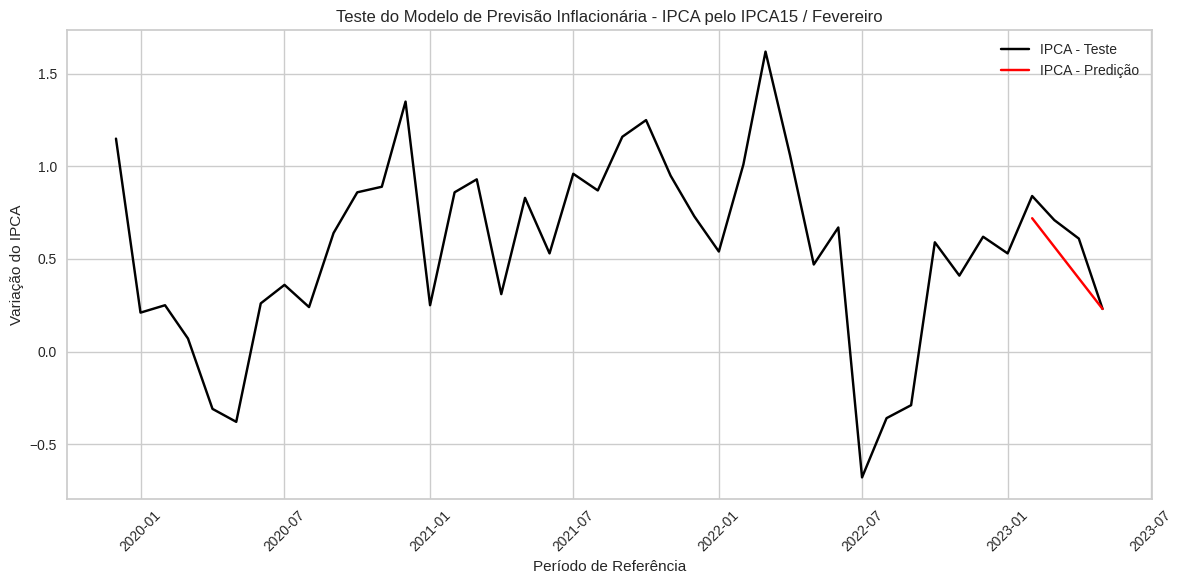

In [52]:
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura de acordo com suas preferências

# Plota os dados de teste
plt.plot(Referencia_test, ipca_test, label="IPCA - Teste", color='black')

# Plota as previsões do modelo
plt.plot(y_pred, x_pred, label="IPCA - Predição", color='red')

plt.xlabel("Período de Referência")
plt.ylabel("Variação do IPCA")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade

plt.title("Teste do Modelo de Previsão Inflacionária - IPCA pelo IPCA15 / Fevereiro")
plt.legend()

plt.tight_layout()  # Melhora o espaçamento entre os elementos do gráfico
plt.show()

In [47]:
float("{:.2f} ".format(previsao_ipca[0][0]))

0.72